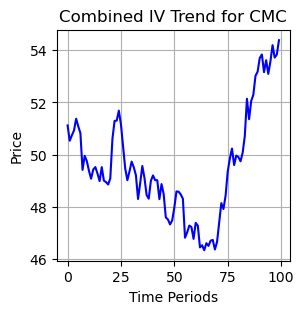

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scrape_url import get_stock_price

def simulate_stock_price(
    ticker, 
    average_iv_calls, 
    average_iv_puts, 
    total_call_volume, 
    total_put_volume, 
    time_periods=100
):

    # Convert annual IV to a daily scale
    daily_iv_calls = average_iv_calls / np.sqrt(252)
    daily_iv_puts = average_iv_puts / np.sqrt(252)

    # Fetch the current price or fall back to a default value
    initial_price = get_stock_price(ticker) or 100

    # Calculate the weighted average IV based on call and put volumes
    total_volume = total_call_volume + total_put_volume
    call_weight = total_call_volume / total_volume
    put_weight = total_put_volume / total_volume
    weighted_iv = daily_iv_calls * call_weight + daily_iv_puts * put_weight

    # Initialize the list of prices with the initial price
    combined_prices = [initial_price]

    # Set the random seed for reproducibility
    np.random.seed(42)

    # Simulate the time series for the stock price
    for _ in range(1, time_periods):
        if np.random.rand() < call_weight:
            # Simulate the daily return for a bullish trend
            daily_return = np.random.normal(loc=daily_iv_calls * 0.1, scale=weighted_iv)
        else:
            # Simulate the daily return for a bearish trend
            daily_return = np.random.normal(loc=-daily_iv_puts * 0.1, scale=weighted_iv)
        new_price = max(combined_prices[-1] * (1 + daily_return), 0)
        combined_prices.append(new_price)

    # Plot the simulated stock price trend
    plt.figure(figsize=(3, 3))
    plt.plot(combined_prices, color='blue')
    plt.title(f'Combined IV Trend for {ticker}')
    plt.xlabel('Time Periods')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

# Example usage:
simulate_stock_price(
    ticker='CMC',
    average_iv_calls=0.09887091810284694,
    average_iv_puts=0.33658210187784826,
    total_call_volume=995.0,
    total_put_volume=443.0,
    time_periods=100
)
